In [260]:
from importlib import reload
import json
import numpy as np
import time
from env import VNLAExplorationBatch
import os
from collections import defaultdict
import utils
import math

## Read the data

In [81]:
data_dir = "/home/hoyeung/blob_matterport3d/asknav/"
with open(data_dir + "asknav_train_original.json", "r") as handle:
    data_full = json.load(handle)
len(data_full)

94798

In [226]:
data_full[0]

{'distances': [24.031958555833757, 22.736805176033286],
 'end_region_name': 'living room',
 'end_regions': [48, 48],
 'heading': 1.0471975511965976,
 'instructions': ['find an armchair in the living room .'],
 'object_indices': [[1399], [1417]],
 'object_name': 'armchair',
 'path_id': 261776,
 'paths': [['cfa7edd3cdea4c428cd1b2e2bdb4aa31',
   '3d0386c86a4a4ada8dc4a3ac54e7315c',
   'bff73ad3851642d79ce25063c9c5a71e',
   '22371c52a50b48419ce5042d631eb1a6',
   'c9e3b241fc8c4bad8b8d5d9e3192ae0a',
   'e4ee9fc1de3f44779759a399b5c0ed7b',
   'b5dc366ccba3406db2e04b8e1fd2270e',
   '2b9575c049fc4539967fffe928f95c2f',
   '5530eac6cc8540a8ba22d50487a5dd2f',
   '89930128220c45b8bb04c3d3990b202c',
   '71c368170cd24345ac3dd89c51ca33ef',
   '3b1e1e0fc3de4418b73673c25ca83431'],
  ['cfa7edd3cdea4c428cd1b2e2bdb4aa31',
   '3d0386c86a4a4ada8dc4a3ac54e7315c',
   'bff73ad3851642d79ce25063c9c5a71e',
   '22371c52a50b48419ce5042d631eb1a6',
   'c9e3b241fc8c4bad8b8d5d9e3192ae0a',
   'e4ee9fc1de3f44779759a399b5c0e

In [90]:
all_tr_scans = set()

for d in data_full:
    all_tr_scans.add(d['scan'])

len(all_tr_scans)

56

In [88]:
with open(data_dir + "asknav_val_seen_original.json", "r") as handle:
    data_full_dev1 = json.load(handle)
print(len(data_full_dev1))

with open(data_dir + "asknav_val_unseen_original.json", "r") as handle:
    data_full_dev2 = json.load(handle)
print(len(data_full_dev2))

4874
5005


In [91]:
all_val_scans = set()

for d in data_full_dev1:
    all_val_scans.add(d['scan'])
    
len(all_val_scans)

56

In [92]:
all_val2_scans = set()

for d in data_full_dev2:
    all_val2_scans.add(d['scan'])
    
len(all_val2_scans)

10

In [93]:
with open(data_dir + "asknav_test_unseen.json", "r") as handle:
    data_full_test2 = json.load(handle)
print(len(data_full_test2))

5001


In [94]:
all_test2_scans = set()

for d in data_full_test2:
    all_test2_scans.add(d['scan'])
    
len(all_test2_scans)

16

In [48]:
with open(data_dir + "asknav_train_small_three_houses_single_goal_short.json", "r") as handle:
    data_100 = json.load(handle)
len(data_100)

100

In [49]:
with open(data_dir + "asknav_train_small_three_goals_short.json", "r") as handle:
    data_1078 = json.load(handle)
len(data_1078)

1078

## Get the scans and viewpoints that appears in gold traj

In [57]:
# within training data
scan_viewpt_pairs = []
scan_viewpt_map = defaultdict(list)
scan_set_100 = set()

for d in data_100:
    for p in d['paths']:
        for v in p:
            scan_set_100.add(d['scan'])
            scan_viewpt_pairs.append((d['scan'], v))
            scan_viewpt_map[d['scan']].append(v)

In [58]:
print(len(scan_viewpt_pairs))
scan_viewpt_pairs[0]

704


('ac26ZMwG7aT', '13faa4c86406405ba802f5bdcba744ee')

In [59]:
print(len(scan_viewpt_map))
len(scan_viewpt_map['ac26ZMwG7aT'])

3


253

In [118]:
# in data 100
scan_viewpt_map.keys()

dict_keys(['cV4RVeZvu5T', '8WUmhLawc2A', 'ac26ZMwG7aT'])

In [61]:
# within training data
scan_viewpt_pairs_1078 = []
scan_viewpt_map_1078 = defaultdict(list)
scan_set_1078 = set()

for d in data_1078:
    for p in d['paths']:
        for v in p:
            scan_set_1078.add(d['scan'])
            scan_viewpt_pairs_1078.append((d['scan'], v))
            scan_viewpt_map_1078[d['scan']].append(v)

In [62]:
print(len(scan_viewpt_pairs_1078))
scan_viewpt_pairs_1078[0]

9291


('aayBHfsNo7d', '9997a34a10ad4502ae927f0855f670a5')

In [119]:
# in data 100
scan_viewpt_map_1078.keys()

dict_keys(['Vvot9Ly1tCj', 'qoiz87JEwZ2', 'sT4fr6TAbpF', '1LXtFkjw3qL', '7y3sRwLe3Va', 'JeFG25nYj2p', 'XcA2TqTSSAj', 'ac26ZMwG7aT', 'cV4RVeZvu5T', '5q7pvUzZiYa', '1pXnuDYAj8r', 'i5noydFURQK', 'VFuaQ6m2Qom', '82sE5b5pLXE', 'sKLMLpTHeUy', 'p5wJjkQkbXX', '5LpN3gDmAk7', 'gTV8FGcVJC9', 'S9hNv5qa7GM', 'aayBHfsNo7d', 'EDJbREhghzL', 'e9zR4mvMWw7', '8WUmhLawc2A', 'ULsKaCPVFJR', 'pRbA3pwrgk9', 'b8cTxDM8gDG', 'VzqfbhrpDEA', '2n8kARJN3HM', 'mJXqzFtmKg4', '759xd9YjKW5', 'JmbYfDe2QKZ'])

In [63]:
print(len(scan_viewpt_map_1078))
len(scan_viewpt_map_1078['ac26ZMwG7aT'])

31


735

In [65]:
scan_set_100

{'8WUmhLawc2A', 'ac26ZMwG7aT', 'cV4RVeZvu5T'}

In [66]:
scan_set_1078

{'1LXtFkjw3qL',
 '1pXnuDYAj8r',
 '2n8kARJN3HM',
 '5LpN3gDmAk7',
 '5q7pvUzZiYa',
 '759xd9YjKW5',
 '7y3sRwLe3Va',
 '82sE5b5pLXE',
 '8WUmhLawc2A',
 'EDJbREhghzL',
 'JeFG25nYj2p',
 'JmbYfDe2QKZ',
 'S9hNv5qa7GM',
 'ULsKaCPVFJR',
 'VFuaQ6m2Qom',
 'Vvot9Ly1tCj',
 'VzqfbhrpDEA',
 'XcA2TqTSSAj',
 'aayBHfsNo7d',
 'ac26ZMwG7aT',
 'b8cTxDM8gDG',
 'cV4RVeZvu5T',
 'e9zR4mvMWw7',
 'gTV8FGcVJC9',
 'i5noydFURQK',
 'mJXqzFtmKg4',
 'p5wJjkQkbXX',
 'pRbA3pwrgk9',
 'qoiz87JEwZ2',
 'sKLMLpTHeUy',
 'sT4fr6TAbpF'}

In [68]:
scan_diff_1078_100 = scan_set_1078 - scan_set_100
len(scan_diff_1078_100)

28

## Load nodes in all training scans

In [100]:
scan_viewpt_map_all_tr_data = defaultdict(list)

for scan in all_tr_scans:
    scan_G = utils.load_nav_graphs(scan)
    for n in scan_G.nodes:
        scan_viewpt_map_all_tr_data[scan].append(n)

## Set variables

In [17]:
os.environ['PT_DATA_DIR']='/home/hoyeung/blob_matterport3d/'

nav_actions = ['left', 'right', 'up', 'down', 'forward', '<end>', '<start>', '<ignore>']
env_actions = [
        (0,-1, 0), # left   30 deg
        (0, 1, 0), # right  30 deg
        (0, 0, 1), # up     30 deg
        (0, 0,-1), # down   30 deg
        (1, 0, 0), # forward to navigable location at ix 1
        (0, 0, 0), # <end>
        (0, 0, 0), # <start>
        (0, 0, 0)  # <ignore>
    ]

## Initiate Sims

In [70]:
batch_size = 100
env = VNLAExplorationBatch(nav_actions, env_actions, obs=None, batch_size=batch_size)

## Try something

In [120]:
scan_time_map_all_tr_scans = {}

for scan in all_tr_scans:
    # compute average time per vertex
    scan_tot_time = []
    # get a list of all vertices in this scan, for each vertex
    for n in scan_viewpt_map_all_tr_data[scan]:
        for _ in range(100*50):
            # randomly choose some heading and elevation
            heading = (np.random.random() * 2 - 1) * 2 * math.pi
            elevation = (np.random.random() * 2 - 1) * 2 * math.pi
            start_time = time.time()
            # call env.sims[0] to set it, time this
            env.sims[0].newEpisode(scan, n, heading, elevation)
            scan_tot_time.append(time.time() - start_time)
    # append the time to tot for scan
    scan_time_map_all_tr_scans[scan] = np.average(scan_tot_time) 

In [121]:
sorted(scan_time_map_all_tr_scans.items(), key=lambda x: x[1], reverse=True)

[('B6ByNegPMKs', 4.748361684273982e-05),
 ('vyrNrziPKCB', 4.582348237759282e-05),
 ('PX4nDJXEHrG', 4.1182713305696525e-05),
 ('VzqfbhrpDEA', 3.9521649469553804e-05),
 ('SN83YJsR3w2', 3.719793193745163e-05),
 ('D7N2EKCX4Sj', 3.6809683396266056e-05),
 ('gTV8FGcVJC9', 3.373100355074003e-05),
 ('uNb9QFRL6hY', 3.133111626889224e-05),
 ('kEZ7cmS4wCh', 3.106040882704845e-05),
 ('E9uDoFAP3SH', 3.100715958028345e-05),
 ('mJXqzFtmKg4', 2.7038548736975937e-05),
 ('2n8kARJN3HM', 2.6874292537730226e-05),
 ('VFuaQ6m2Qom', 2.5483159105220955e-05),
 ('ac26ZMwG7aT', 2.451528260202119e-05),
 ('V2XKFyX4ASd', 2.2881002790608985e-05),
 ('p5wJjkQkbXX', 2.264677976307116e-05),
 ('29hnd4uzFmX', 2.1730768446828804e-05),
 ('Uxmj2M2itWa', 2.149067064271356e-05),
 ('Vvot9Ly1tCj', 2.1397892634073894e-05),
 ('82sE5b5pLXE', 2.1143952122441043e-05),
 ('5LpN3gDmAk7', 2.1143929958343507e-05),
 ('qoiz87JEwZ2', 2.0628930594174917e-05),
 ('sKLMLpTHeUy', 2.002324156873808e-05),
 ('1LXtFkjw3qL', 1.9758870583454162e-05),
 ('

In [103]:
(np.random.random() * 2 - 1) * 2 * math.pi

0.5727192299742875

In [127]:
time = 0.0
for k in scan_viewpt_map.keys():
    time += scan_time_map_all_tr_scans[k] * 100 * 50
time / len(scan_viewpt_map)

0.09187090486874294

In [128]:
time = 0.0
for k in scan_viewpt_map_1078.keys():
    time += scan_time_map_all_tr_scans[k] * 100 * 50
time / len(scan_viewpt_map_1078)

0.09633732424153657

In [129]:
time = 0.0
for k in scan_time_map_all_tr_scans.keys():
    time += scan_time_map_all_tr_scans[k] * 100 * 50
time / len(scan_time_map_all_tr_scans)

0.1018601267037432

In [ ]:
# data 100
scan_viewpt_map.keys()
#dict_keys(['cV4RVeZvu5T', '8WUmhLawc2A', 'ac26ZMwG7aT'])
('ac26ZMwG7aT', 2.4650458133581913e-05)
('8WUmhLawc2A', 1.5587706314890007e-05)
('cV4RVeZvu5T', 1.513724856906467e-05)

# data 1078
scan_viewpt_map_1078.keys()
# dict_keys(['Vvot9Ly1tCj', 'qoiz87JEwZ2', 'sT4fr6TAbpF', '1LXtFkjw3qL', '7y3sRwLe3Va', 'JeFG25nYj2p', 'XcA2TqTSSAj', 'ac26ZMwG7aT', 'cV4RVeZvu5T', '5q7pvUzZiYa', '1pXnuDYAj8r', 'i5noydFURQK', 'VFuaQ6m2Qom', '82sE5b5pLXE', 'sKLMLpTHeUy', 'p5wJjkQkbXX', '5LpN3gDmAk7', 'gTV8FGcVJC9', 'S9hNv5qa7GM', 'aayBHfsNo7d', 'EDJbREhghzL', 'e9zR4mvMWw7', '8WUmhLawc2A', 'ULsKaCPVFJR', 'pRbA3pwrgk9', 'b8cTxDM8gDG', 'VzqfbhrpDEA', '2n8kARJN3HM', 'mJXqzFtmKg4', '759xd9YjKW5', 'JmbYfDe2QKZ'])

## Dummy script to load nodes outside training code

In [131]:
# Try a different way
import time

scan_time_map_all_tr_scans = {}

for scan in all_tr_scans:
    # compute average time per vertex
    scan_tot_time = []
    # get a list of all vertices in this scan, for each vertex
    for n in scan_viewpt_map_all_tr_data[scan]:
        for _ in range(50):
            for i in range(batch_size):
                # randomly choose some heading and elevation
                heading = (np.random.random() * 2 - 1) * 2 * math.pi
                elevation = (np.random.random() * 2 - 1) * 2 * math.pi
                start_time = time.time()
                # call env.sims[0] to set it, time this
                env.sims[i].newEpisode(scan, n, heading, elevation)
                scan_tot_time.append(time.time() - start_time)
    # append the time to tot for scan
    scan_time_map_all_tr_scans[scan] = np.average(scan_tot_time) 

In [132]:
sorted(scan_time_map_all_tr_scans.items(), key=lambda x: x[1], reverse=True)

[('vyrNrziPKCB', 5.678904290015337e-05),
 ('B6ByNegPMKs', 5.617932195248811e-05),
 ('PX4nDJXEHrG', 4.984587642317968e-05),
 ('VzqfbhrpDEA', 4.785925723277161e-05),
 ('D7N2EKCX4Sj', 4.535235606707059e-05),
 ('SN83YJsR3w2', 4.351669041615612e-05),
 ('kEZ7cmS4wCh', 3.839941096665272e-05),
 ('gTV8FGcVJC9', 3.740342974146723e-05),
 ('uNb9QFRL6hY', 3.712928485422627e-05),
 ('E9uDoFAP3SH', 3.496930829940304e-05),
 ('mJXqzFtmKg4', 3.23151984542766e-05),
 ('2n8kARJN3HM', 3.230650527502901e-05),
 ('VFuaQ6m2Qom', 2.916946011389087e-05),
 ('ac26ZMwG7aT', 2.849974603363962e-05),
 ('V2XKFyX4ASd', 2.8382171946726026e-05),
 ('29hnd4uzFmX', 2.7653134102914846e-05),
 ('p5wJjkQkbXX', 2.7583873271942138e-05),
 ('5LpN3gDmAk7', 2.6229000091552734e-05),
 ('Vvot9Ly1tCj', 2.5978281142863822e-05),
 ('Uxmj2M2itWa', 2.5940534842275356e-05),
 ('82sE5b5pLXE', 2.5053222091109665e-05),
 ('1LXtFkjw3qL', 2.427972546060577e-05),
 ('sKLMLpTHeUy', 2.3369035570640264e-05),
 ('VLzqgDo317F', 2.3363176981608073e-05),
 ('pRbA3

In [ ]:
# some nodes are harder than others. check gold traj nodes.

## Look at only nodes in gold trajectories

In [ ]:
scan_viewpt_map
scan_viewpt_map_1078

In [210]:
# Try a different way
import time

scan_time_map_data_100 = {}
scan_time_map_data_100_sum = {}

for scan in scan_viewpt_map:
    # compute average time per vertex
    scan_tot_time = []
    # get a list of all vertices in this scan, for each vertex
    for n in scan_viewpt_map[scan]:
        for _ in range(50):
            for i in range(batch_size):
                # randomly choose some heading and elevation
                heading = (np.random.random() * 2 - 1) * 2 * math.pi
                elevation = (np.random.random() * 2 - 1) * 2 * math.pi
                start_time = time.time()
                # call env.sims[0] to set it, time this
                env.sims[i].newEpisode(scan, n, heading, elevation)
                scan_tot_time.append(time.time() - start_time)
    # append the time to tot for scan
    scan_time_map_data_100[scan] = np.average(scan_tot_time)
    scan_time_map_data_100_sum[scan] = np.sum(scan_tot_time)

In [139]:
sorted(scan_time_map_data_100.items(), key=lambda x: x[1], reverse=True)

[('ac26ZMwG7aT', 2.6040046865289862e-05),
 ('8WUmhLawc2A', 1.7572052835479495e-05),
 ('cV4RVeZvu5T', 1.6333232676317244e-05)]

In [209]:
scan_time_map_data_100

{'8WUmhLawc2A': 1.7572052835479495e-05,
 'ac26ZMwG7aT': 2.6040046865289862e-05,
 'cV4RVeZvu5T': 1.6333232676317244e-05}

In [150]:
np.average([val for val in scan_time_map_data_100.values()])

1.9981777459028865e-05

In [140]:
# Try a different way
import time

scan_time_map_data_1078 = {}

for scan in scan_viewpt_map_1078:
    # compute average time per vertex
    scan_tot_time = []
    # get a list of all vertices in this scan, for each vertex
    for n in scan_viewpt_map_1078[scan]:
        for _ in range(50):
            for i in range(batch_size):
                # randomly choose some heading and elevation
                heading = (np.random.random() * 2 - 1) * 2 * math.pi
                elevation = (np.random.random() * 2 - 1) * 2 * math.pi
                start_time = time.time()
                # call env.sims[0] to set it, time this
                env.sims[i].newEpisode(scan, n, heading, elevation)
                scan_tot_time.append(time.time() - start_time)
    # append the time to tot for scan
    scan_time_map_data_1078[scan] = np.average(scan_tot_time) 

In [141]:
sorted(scan_time_map_data_1078.items(), key=lambda x: x[1], reverse=True)

[('VzqfbhrpDEA', 4.2882962540118364e-05),
 ('gTV8FGcVJC9', 3.3886367502346846e-05),
 ('mJXqzFtmKg4', 2.967675018310547e-05),
 ('2n8kARJN3HM', 2.899451628528194e-05),
 ('VFuaQ6m2Qom', 2.7437195229454163e-05),
 ('ac26ZMwG7aT', 2.635674067905971e-05),
 ('p5wJjkQkbXX', 2.5219303131103515e-05),
 ('Vvot9Ly1tCj', 2.377617869017809e-05),
 ('5LpN3gDmAk7', 2.3772971849914985e-05),
 ('82sE5b5pLXE', 2.326460713925569e-05),
 ('1LXtFkjw3qL', 2.1902761572883242e-05),
 ('sKLMLpTHeUy', 2.174639230892982e-05),
 ('qoiz87JEwZ2', 2.148977862464057e-05),
 ('pRbA3pwrgk9', 2.111816308936294e-05),
 ('b8cTxDM8gDG', 1.968080097214315e-05),
 ('7y3sRwLe3Va', 1.9603125017080735e-05),
 ('XcA2TqTSSAj', 1.9301970446551288e-05),
 ('S9hNv5qa7GM', 1.9278912947922156e-05),
 ('ULsKaCPVFJR', 1.8012909155625563e-05),
 ('8WUmhLawc2A', 1.761483673576836e-05),
 ('1pXnuDYAj8r', 1.6859687868931166e-05),
 ('JeFG25nYj2p', 1.6443124207310708e-05),
 ('cV4RVeZvu5T', 1.6299921138956494e-05),
 ('5q7pvUzZiYa', 1.6176338135441646e-05),
 (

In [151]:
np.average([val for val in scan_time_map_data_1078.values()])

2.096860128413596e-05

In [152]:
# Try a different way
import time

scan_node_time_map_data_1078 = {}

for scan in scan_viewpt_map_1078:
    # compute average time per vertex
    scan_node_time_map_data_1078[scan] = {}
    # get a list of all vertices in this scan, for each vertex
    for n in scan_viewpt_map_1078[scan]:
        scan_n_tot_time = []
        for _ in range(50):
            for i in range(batch_size):
                # randomly choose some heading and elevation
                heading = (np.random.random() * 2 - 1) * 2 * math.pi
                elevation = (np.random.random() * 2 - 1) * 2 * math.pi
                start_time = time.time()
                # call env.sims[0] to set it, time this
                env.sims[i].newEpisode(scan, n, heading, elevation)
                scan_tot_time.append(time.time() - start_time)
        scan_node_time_map_data_1078[scan][n] = np.average(scan_n_tot_time) 

/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
sorted(scan_time_map_data_1078.items(), key=lambda x: x[1], reverse=True)

In [153]:
l = [1,2,3]
l += [4,5,6]

In [154]:
l

[1, 2, 3, 4, 5, 6]

In [155]:
from collections import defaultdict
defaultdict(lambda : defaultdict(list))

defaultdict(<function __main__.<lambda>()>, {})

## Hit Debug, run this and save scan_v_time

In [ ]:
# ((scan, node), (average time, total number of calls, total time)), 

scan_v_time = {}

for scan in nodes_time_report.keys():
    for v in nodes_time_report[scan]:
        time_scalar_list = nodes_time_report[scan][v]
        scan_v_time[(scan, v)] = (np.average(time_scalar_list), len(time_scalar_list), np.sum(time_scalar_list))

In [ ]:
# (scan, node): [avg time, number of calls, total time]

## Local analysis

In [243]:
import pickle

# data 1078
with open("/home/hoyeung/Documents/vnla/dummy_scan_time.pickle", "rb") as handle:
    scan_v_time_data_1078 = pickle.load(handle)
    
# data 100
with open("/home/hoyeung/Documents/vnla/dummy_scan_time_data_100.pickle", "rb") as handle:
    scan_v_time_data_100 = pickle.load(handle)
    
# data full
with open("/home/hoyeung/Documents/vnla/dummy_scan_time_data_94798.pickle", "rb") as handle:
    scan_v_time_data_94798 = pickle.load(handle)
    
# data full 2
with open("/home/hoyeung/Documents/vnla/dummy_scan_time_data_94798_2.pickle", "rb") as handle:
    scan_v_time_data_94798_2 = pickle.load(handle)

In [250]:
sort_tups_by_sum_1078 = sorted(scan_v_time_data_1078.items(), key=lambda x: x[1][2], reverse = True)
sort_tups_by_sum_100 = sorted(scan_v_time_data_100.items(), key=lambda x: x[1][2], reverse = True)
sort_tups_by_sum_94798 = sorted(scan_v_time_data_94798.items(), key=lambda x: x[1][2], reverse = True)
sort_tups_by_sum_94798_2 = sorted(scan_v_time_data_94798_2.items(), key=lambda x: x[1][2], reverse = True)

sort_tups_by_avg_1078 = sorted(scan_v_time_data_1078.items(), key=lambda x: x[1][0], reverse = True)
sort_tups_by_avg_100 = sorted(scan_v_time_data_100.items(), key=lambda x: x[1][0], reverse = True)
sort_tups_by_avg_94798 = sorted(scan_v_time_data_94798.items(), key=lambda x: x[1][0], reverse = True)
sort_tups_by_avg_94798_2 = sorted(scan_v_time_data_94798_2.items(), key=lambda x: x[1][0], reverse = True)

In [251]:
cumu_all_1078 = []
cumu_sum_1078 = 0.0
for i in range(len(sort_tups_by_sum_1078)):
    cumu_sum_1078 += sort_tups_by_sum_1078[i][1][2]
    cumu_all_1078.append(cumu_sum_1078)

In [252]:
cumu_all_100 = []
cumu_sum_100 = 0.0
for i in range(len(sort_tups_by_sum_100)):
    cumu_sum_100 += sort_tups_by_sum_100[i][1][2]
    cumu_all_100.append(cumu_sum_100)

In [253]:
cumu_all_94798 = []
cumu_sum_94798 = 0.0
for i in range(len(sort_tups_by_sum_94798)):
    cumu_sum_94798 += sort_tups_by_sum_94798[i][1][2]
    cumu_all_94798.append(cumu_sum_94798)

In [254]:
cumu_all_94798_2 = []
cumu_sum_94798_2 = 0.0
for i in range(len(sort_tups_by_sum_94798_2)):
    cumu_sum_94798_2 += sort_tups_by_sum_94798_2[i][1][2]
    cumu_all_94798_2.append(cumu_sum_94798_2)

In [255]:
print(cumu_sum_1078)
print(cumu_sum_100)
print(cumu_sum_94798)
print(cumu_sum_94798_2)

40.98676156997681
4.304455757141113
77.94051504135132
109.095547914505


In [257]:
56 / 31

1.8064516129032258

In [258]:
40 * 1.8

72.0

In [238]:
1e-5

1e-05

In [259]:
for tup in sort_tups_by_sum_1078:
    if tup[0] in scan_v_time_data_100:
        print (tup[0])
        print (scan_v_time_data_100[tup[0]])
        print (scan_v_time_data_1078[tup[0]])
        print (scan_v_time_data_94798[tup[0]])
        # print (scan_v_time_data_94798_2[tup[0]])
        print ("---------------------------------------------")

('ac26ZMwG7aT', 'd710e361173943d189ad82b18c11572d')
(0.0012328243255615235, 50, 0.06164121627807617)
(0.009124957598172702, 13, 0.11862444877624512)
(3.3020973205566406e-05, 2, 6.604194641113281e-05)
---------------------------------------------
('ac26ZMwG7aT', '4382fba86a6a4956b7007f079a990268')
(0.0008136796951293946, 50, 0.04068398475646973)
(0.006671786308288574, 14, 0.09340500831604004)
(0.000526450929187593, 42, 0.022110939025878906)
---------------------------------------------
('ac26ZMwG7aT', '1f26654b50334ed29c4bf161a0150700')
(0.00041463851928710935, 50, 0.02073192596435547)
(0.006282363619123187, 14, 0.08795309066772461)
(0.006530952453613281, 5, 0.032654762268066406)
---------------------------------------------
('ac26ZMwG7aT', '101eadbcb4a74791b0da3d32ee6f71f5')
(0.001237635612487793, 50, 0.06188178062438965)
(0.004877805709838867, 15, 0.07316708564758301)
(3.424974588247446e-05, 26, 0.0008904933929443359)
---------------------------------------------
('ac26ZMwG7aT', 'a4aa

KeyError: ('ac26ZMwG7aT', '650897afb8594b7cb9bdb89f4ec38f7d')

In [ ]:
for d in data_1078:
    

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

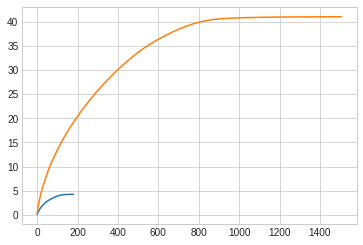

In [218]:
fig = plt.figure()
ax = plt.axes()

# x axis - one (scan vertex) tup per unit
plt.plot(range(len(cumu_all_100)), cumu_all_100)
plt.plot(range(len(cumu_all_1078)), cumu_all_1078)

In [ ]:
# if all tuples take same amount of time and are called same number of times -- no elbow
# if some tuples take a lot longer -- elbow
# if some tuples are called much more -- elbow

# 800 of the 1400 tuples are responsible for this elbow

In [197]:
sort_tups_by_sum_keys = [tup[0] for tup in sort_tups_by_sum]

In [205]:
# Look at positions of data 1000 (scan, vertex) tuples on this curve here

v_in_data_1078 = []
c = 0
for tup in scan_viewpt_pairs:
    if tup in sort_tups_by_sum_keys:
        v_in_data_1078.append(sort_tups_by_sum_keys.index(tup))
        c += 1

In [202]:
len(v_in_data_1078)

698

## Inspect size of scans in different datasets

In [265]:
print(len(all_tr_scans))
print(len(scan_set_100))
print(len(scan_set_1078))

56
3
31


In [268]:
scan_set_100

{'8WUmhLawc2A', 'ac26ZMwG7aT', 'cV4RVeZvu5T'}

In [269]:
# on average, how many vertices are there for each scan set
graph = utils.load_nav_graphs('8WUmhLawc2A', path=None)

In [273]:
len(graph.nodes)

95

In [283]:
scan_sizes_100 = []
for scan in scan_set_100:
    graph = utils.load_nav_graphs(scan, path=None)
    scan_sizes_100.append(len(graph.nodes))

print ("scan sizes for dataset 100, {} scans: \n{}".format(len(scan_set_100), scan_sizes_100))

scan sizes for dataset 100, 3 scans: 
[90, 95, 165]


In [321]:
scan_sizes_100 = []
for scan in scan_set_100:
    print(scan)
    graph = utils.load_nav_graphs(scan, path=None)
    scan_sizes_100.append(len(graph.nodes))

print ("scan sizes for dataset 100, {} scans: \n{}".format(len(scan_set_100), scan_sizes_100))

cV4RVeZvu5T
8WUmhLawc2A
ac26ZMwG7aT
scan sizes for dataset 100, 3 scans: 
[90, 95, 165]


In [284]:
scan_sizes_1078 = []
for scan in scan_set_1078:
    graph = utils.load_nav_graphs(scan, path=None)
    scan_sizes_1078.append(len(graph.nodes))

print ("scan sizes for dataset 1078, {} scans: \n{}".format(len(scan_sizes_1078), scan_sizes_1078))

scan sizes for dataset 1078, 31 scans: 
 [131, 81, 84, 165, 90, 95, 56, 167, 135, 127, 231, 110, 71, 89, 61, 123, 114, 289, 186, 189, 141, 131, 106, 109, 152, 140, 70, 87, 95, 101, 79]


In [301]:
scan_sizes_tr = []
all_tr_scans_list = list(all_tr_scans)
for scan in all_tr_scans_list:
    graph = utils.load_nav_graphs(scan, path=None)
    scan_sizes_tr.append(len(graph.nodes))

print ("scan sizes for dataset full training, {} scans: \n{}".format(len(all_tr_scans), scan_sizes_tr))

scan sizes for dataset full training, 56 scans: 
[49, 131, 81, 77, 217, 84, 34, 34, 165, 61, 90, 113, 95, 345, 56, 167, 135, 127, 231, 110, 123, 71, 89, 265, 12, 123, 114, 289, 186, 189, 141, 118, 337, 131, 61, 109, 213, 102, 44, 106, 48, 101, 137, 282, 199, 152, 140, 50, 70, 87, 95, 157, 118, 61, 79, 260]


In [299]:
np.average(scan_sizes_tr)

129.66071428571428

In [297]:
scan_sizes_diff_full_tr_1078 = []
scan_diff_set = list(set(all_tr_scans) - set(scan_set_1078))
for scan in scan_diff_set:
    graph = utils.load_nav_graphs(scan, path=None)
    scan_sizes_diff_full_tr_1078.append(len(graph.nodes))

print ("scan sizes for dataset full training - 1078, {} scans: \n{}".format\
       (len(scan_diff_set), list(zip(scan_diff_set,scan_sizes_diff_full_tr_1078))))

scan sizes for dataset full training - 1078, 25 scans: 
[('JF19kD82Mey', 49), ('ZMojNkEp431', 77), ('E9uDoFAP3SH', 217), ('Pm6F8kyY3z2', 34), ('HxpKQynjfin', 34), ('r47D5H71a5s', 61), ('r1Q1Z4BcV1o', 113), ('B6ByNegPMKs', 345), ('GdvgFV5R1Z5', 12), ('VLzqgDo317F', 123), ('SN83YJsR3w2', 265), ('rPc6DW4iMge', 118), ('vyrNrziPKCB', 337), ('VVfe2KiqLaN', 61), ('uNb9QFRL6hY', 213), ('29hnd4uzFmX', 102), ('17DRP5sb8fy', 44), ('jh4fc5c5qoQ', 48), ('Uxmj2M2itWa', 137), ('PX4nDJXEHrG', 282), ('kEZ7cmS4wCh', 199), ('s8pcmisQ38h', 50), ('V2XKFyX4ASd', 157), ('ur6pFq6Qu1A', 118), ('D7N2EKCX4Sj', 260)]


## How representative are large scans in data 1078 vs full training

In [309]:
large_size_scan_set = [scan for (i, scan) in enumerate(all_tr_scans_list) if scan_sizes_tr[i] > 129]
print(len(large_size_scan_set))

extra_large_size_scan_set = [scan for (i, scan) in enumerate(all_tr_scans_list) if scan_sizes_tr[i] > 200]
print(len(extra_large_size_scan_set))

22
9


In [311]:
ct_large_scan = 0
ct_extra_large_scan = 0
for d in data_1078:
    if d['scan'] in large_size_scan_set:
        ct_large_scan += 1
    if d['scan'] in extra_large_size_scan_set:
        ct_extra_large_scan += 1
        
print (ct_large_scan)
print (ct_large_scan / 1078)
print (ct_extra_large_scan)
print (ct_extra_large_scan / 1078)

486
0.45083487940630795
93
0.0862708719851577


In [310]:
ct_large_scan = 0
ct_extra_large_scan = 0
for d in data_full:
    if d['scan'] in large_size_scan_set:
        ct_large_scan += 1
    if d['scan'] in extra_large_size_scan_set:
        ct_extra_large_scan += 1
        
print (ct_large_scan)
print (ct_large_scan / 94798)
print (ct_extra_large_scan)
print (ct_extra_large_scan / 94798)

54278
0.5725648220426591
24114
0.2543724551150868


In [314]:
scan_ctr = []
for d in data_full:
    scan_ctr.append(d['scan'])
    
scan_counter = Counter(scan_ctr)

In [319]:
len(scan_counter)

56

In [315]:
scan_counter.most_common()

[('ac26ZMwG7aT', 5907),
 ('VzqfbhrpDEA', 5417),
 ('vyrNrziPKCB', 5184),
 ('mJXqzFtmKg4', 4330),
 ('Vvot9Ly1tCj', 3987),
 ('gTV8FGcVJC9', 3660),
 ('1pXnuDYAj8r', 3275),
 ('cV4RVeZvu5T', 3271),
 ('p5wJjkQkbXX', 2867),
 ('2n8kARJN3HM', 2780),
 ('EDJbREhghzL', 2725),
 ('8WUmhLawc2A', 2612),
 ('SN83YJsR3w2', 2384),
 ('JmbYfDe2QKZ', 2364),
 ('759xd9YjKW5', 2217),
 ('uNb9QFRL6hY', 2071),
 ('JeFG25nYj2p', 1941),
 ('qoiz87JEwZ2', 1923),
 ('PX4nDJXEHrG', 1910),
 ('D7N2EKCX4Sj', 1907),
 ('aayBHfsNo7d', 1735),
 ('b8cTxDM8gDG', 1712),
 ('82sE5b5pLXE', 1652),
 ('5LpN3gDmAk7', 1626),
 ('1LXtFkjw3qL', 1493),
 ('kEZ7cmS4wCh', 1469),
 ('ULsKaCPVFJR', 1412),
 ('ZMojNkEp431', 1409),
 ('e9zR4mvMWw7', 1370),
 ('VFuaQ6m2Qom', 1368),
 ('rPc6DW4iMge', 1354),
 ('S9hNv5qa7GM', 1180),
 ('5q7pvUzZiYa', 1151),
 ('pRbA3pwrgk9', 1126),
 ('E9uDoFAP3SH', 1051),
 ('17DRP5sb8fy', 1040),
 ('XcA2TqTSSAj', 896),
 ('i5noydFURQK', 806),
 ('7y3sRwLe3Va', 806),
 ('sT4fr6TAbpF', 793),
 ('r47D5H71a5s', 676),
 ('jh4fc5c5qoQ', 639)

In [316]:
scan_names = [tup[0] for tup in scan_counter.most_common()]
scan_ct = [tup[1] for tup in scan_counter.most_common()]

<BarContainer object of 56 artists>

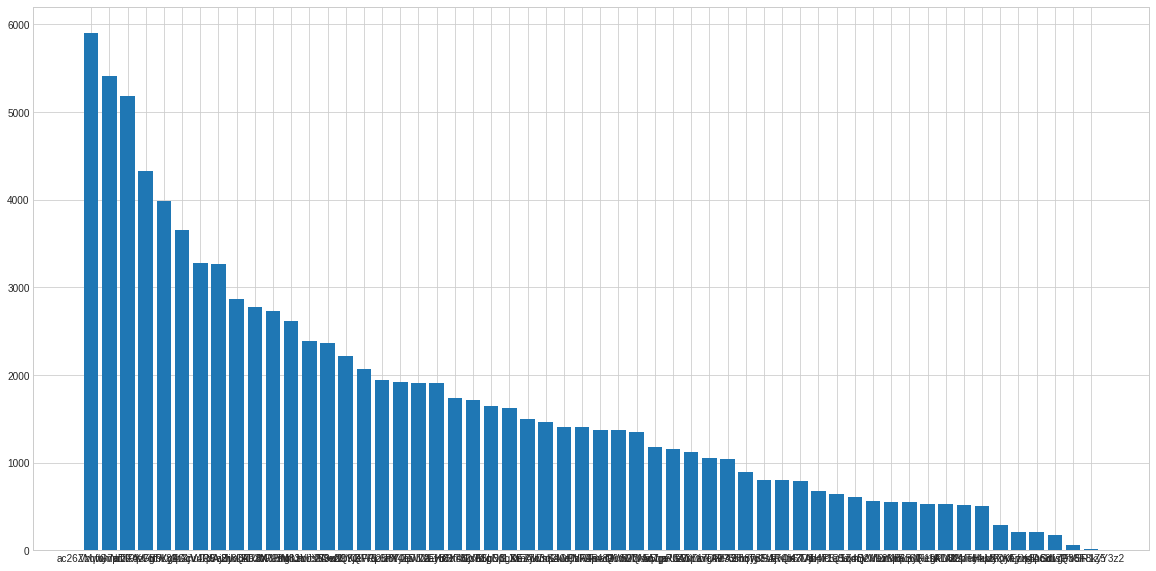

In [318]:
plt.figure(figsize=(20,10))
plt.bar(scan_names, scan_ct)